In [73]:
import cv2
import numpy as np
import requests
import os

url = 'http://127.0.0.1:8000/predict/'

arquivos = ['../imagens/imagem_negativa.png', '../imagens/imagem_positiva.png', '../imagens/imagem_positiva_ruido.png']

for arquivo in arquivos:
    if not os.path.isfile(arquivo):
        print(f"{arquivo} -> Arquivo não encontrado")
    else:
        #Le o arquivo com a imagem a ser processada
        image = cv2.imread(arquivo)

        # Prepara a imagem para envio na requisicao da API
        # Converte para escala de cinza
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Escala o valor dos pixels de  0-255 apra 0-16
        scaled_image = (gray_image / 255.0 * 16).astype(np.uint8)
        # Converte para lista 
        scaled_image_list = scaled_image.reshape(1, -1).tolist()
        # Monta o dicionario para envio
        data = {
            'image': scaled_image_list
        }

        try:
            response = requests.post(url, json=data)
            print(response.status_code)
            result = response.json()
            np_array = np.array(result).reshape((8, 8))
            print(np_array)
        except requests.exceptions.HTTPError as http_err:
            print(f"{arquivo} -> erro de HTTP: {http_err}")
        except requests.exceptions.ConnectionError as conn_err:
            print(f"{arquivo} -> erro de conexão: {conn_err}")
        except requests.exceptions.Timeout as timeout_err:
            print(f"{arquivo} -> erro de Timeout: {timeout_err}")
        except requests.exceptions.RequestException as req_err:
            print(f"{arquivo} -> erro: {req_err}")



200
[[15 11 10  5  6  5 16 13]
 [12  0 11  9 11  5 12 10]
 [ 9 15 11  5 14 12 10  6]
 [ 3  6 14 15  7  0  0 12]
 [ 9 10  4  9  6  9  3  9]
 [ 9  5  9 12  3  3 12 12]
 [ 6 10 13 10  7  2  7 10]
 [ 3  2 13 13 12 14 14  8]]
200
[[ 0  0  5 13  9  1  0  0]
 [ 0  0 13 16 10 16  5  0]
 [ 0  3 16  2  0 11  8  0]
 [ 0  4 12  0  0  8  8  0]
 [ 0  5  8  0  0  9  8  0]
 [ 0  4 11  0  1 12  7  0]
 [ 0  2 14  5 10 12  0  0]
 [ 0  0  6 13 10  0  0  0]]
200
[[ 0  0  5 13  9  1  0  0]
 [ 0  0 13 15 10 16  5  0]
 [ 0  3 15  2  0 11  8  0]
 [ 0  4 12  0  0  8  8  0]
 [ 0  5  8  0  0  9  8  0]
 [ 0  4 11  0  1 12  7  0]
 [ 0  2 15  5 10 12  0  0]
 [ 0  0  6 13 11  0  0  0]]


<Figure size 640x480 with 0 Axes>

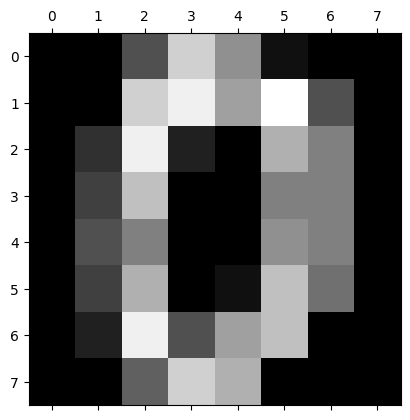

In [74]:
import matplotlib.pyplot as plt

#img_data = np.array(scaled_image_list, dtype=np.uint8)
# Reshape to 8x8
image = np.array(response.text)

plt.gray()
plt.matshow(np_array)
plt.show()